In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML


In [3]:
train_file_path = 'C:/AdvayRepos/personal_projects/housing/data_hs/train.csv'
test_file_path = 'C:/AdvayRepos/personal_projects/housing/data_hs/test.csv'

X_train = pd.read_csv(train_file_path)
X_test = pd.read_csv(test_file_path)

X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
numerical_vars = X_train.select_dtypes(include=[np.number])
numerical_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
categorical_features = X_train.select_dtypes(include=[object])
categorical_features.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [7]:
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
missing_percentage = (X_train.isnull().sum() / len(X_train)) * 100

missing_above_zero = missing_percentage[missing_percentage > 0]

print(missing_above_zero)


LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


<Axes: >

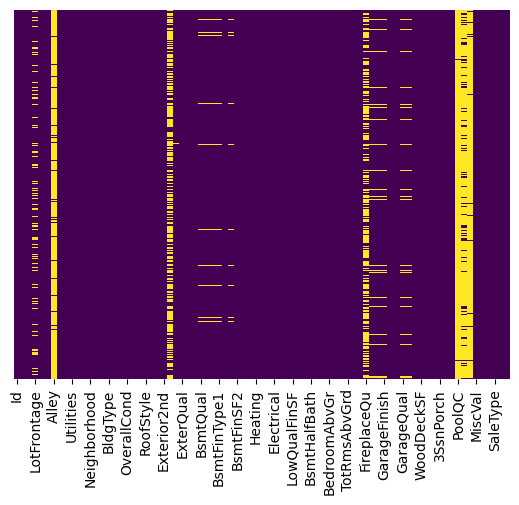

In [9]:
sns.heatmap(X_train.isnull(), yticklabels=False, cbar = False,cmap='viridis')

In [10]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(X_train['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=X_train['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(X_train['SalePrice'].min(), X_train['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create a Q-Q plot
qq_data = stats.probplot(X_train['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

#notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [11]:
# 1. Distribution of dwelling types and their relation to sale prices
dwelling_types = X_train['BldgType'].value_counts()
dwelling_prices = X_train.groupby('BldgType')['SalePrice'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

# Show the figures
fig1.show()
fig2.show()

In [12]:
# 2. Zoning impact on sale price
zoning_prices = X_train.groupby('MSZoning')['SalePrice'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values, title='Average Sale Price by Zoning',
              color_discrete_sequence=['purple', 'green'], text=zoning_prices.values,
              template='plotly_dark')

fig3.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig3.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig3.update_xaxes(title='Zoning')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig3.show()

In [13]:
# 3. Street and alley access types effect on sale price
street_prices = X_train.groupby('Street')['SalePrice'].mean()
alley_prices = X_train.groupby('Alley')['SalePrice'].mean()

# Street Prices
colors_street = np.where(street_prices.index == 'Pave', 'purple', 'green')
fig5 = px.bar(x=street_prices.index, y=street_prices.values, title='Average Sale Price by Street Type',
              template='plotly_dark', text=street_prices.values,
              color=colors_street, color_discrete_sequence=['purple', 'green'])

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Street Type')
fig5.update_layout(showlegend=False)

# Alley Prices
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
fig6 = px.bar(x=alley_prices.index, y=alley_prices.values, title='Average Sale Price by Alley Type',
              template='plotly_dark', text=alley_prices.values,
              color=colors_alley, color_discrete_sequence=['purple', 'green'])

fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig6.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig6.update_xaxes(title='Alley Type')
fig6.update_layout(showlegend=False)

fig5.show()
fig6.show()

In [14]:
# 4. Average sale price by property shape
colors = px.colors.qualitative.Plotly

shape_prices = X_train.groupby('LotShape')['SalePrice'].mean()
contour_prices = X_train.groupby('LandContour')['SalePrice'].mean()
# Shape Prices
fig7 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape',
              template='plotly_dark', text=shape_prices.values)

fig7.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Property Shape')
fig7.update_layout(showlegend=False)

# Contour Prices
fig8 = px.bar(x=contour_prices.index, y=contour_prices.values, title='Average Sale Price by Property Contour',
              template='plotly_dark', text=contour_prices.values)

fig8.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig8.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig8.update_xaxes(title='Property Contour')
fig8.update_layout(showlegend=False)

fig7.show()
fig8.show()

In [15]:
# 5. Calculate Property Age
X_train['PropertyAge'] = X_train['YrSold'] - X_train['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = X_train['PropertyAge'].corr(X_train['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(X_train, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price', color='PropertyAge', color_continuous_scale=px.colors.sequential.Purp)

fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()

Correlation between Property Age and Sale Price: -0.523350417546816


In [16]:
# 6. Calculate Correlation between Living Area and Sale Price
living_area_price_corr = X_train['GrLivArea'].corr(X_train['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig10 = px.scatter(X_train, x='GrLivArea', y='SalePrice', title='Living Area (above grade) vs Sale Price', color='GrLivArea', color_continuous_scale=px.colors.sequential.Purp)

fig10.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


In [17]:
# 7. Box plot of price over the years
yearly_avg_sale_price = X_train.groupby('YrSold')['SalePrice'].mean()

fig13 = px.box(X_train, x='YrSold', y='SalePrice', title='Sale Price Trends Over the Years',
               points=False, color_discrete_sequence=['green'])

fig13.add_trace(px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0])

fig13.update_traces(line=dict(color='purple', width=4), selector=dict(type='scatter', mode='lines'))

for year, avg_price in yearly_avg_sale_price.items():
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color='white'),
        showarrow=False,
        bgcolor='rgba(128, 0, 128, 0.6)'
    )

fig13.update_layout(
    plot_bgcolor='rgb(30,30,30)',
    paper_bgcolor='rgb(30,30,30)',
    font=dict(color='white'),
    xaxis_title='Year Sold',
    yaxis_title='Sale Price'
)

fig13.show()

In [18]:
X_train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
#acts on numeric data in the dataset
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [20]:

# Update categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = X_train.drop('SalePrice', axis=1)
y = np.log(X_train['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1761766556858557

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15328948266043066

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13768364339658068



In [22]:

from sklearn.neural_network import MLPRegressor

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.22778267781613565


In [23]:
#pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16342918001751988

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.152082228633926

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13743317540857025



In [25]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.21800371653991985


In [ ]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp.predict(X_test_scaled),y_test))))

In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))

In [ ]:
var_explore = df[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]

display(HTML(create_scrollable_table(var_explore, 'var_explore', 'List of Variables to Explore for Feature Engineering')))

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


#make this better, one functtion? get new variables in the pipeline? 

In [ ]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

In [ ]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)


In [ ]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

In [ ]:
X_test_preprocessed = pipeline_fe.transform(X_test)